<font size="+5">#08. Hyperparameter Tuning with Cross Validation</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - The goal of this dataset is
> - To predict if **bank's customers** (rows) `default` next month
> - Based on their **socio-demographical characteristics** (columns)

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
9410,440000,2,2,1,28,-2,-2,-2,-2,-2,-2,8325,-4341,-15641,7059,-4220,-16370,0,752,34000,284,3650,52719,0
26301,50000,2,1,2,33,2,2,0,0,-1,0,60679,54947,54425,48313,19399,19804,0,4500,1200,71941,619,563,1
27293,450000,1,1,1,37,-2,-2,-2,-2,-2,-2,16666,16662,19428,2994,23787,41175,16662,19432,3005,23788,41214,36472,0
7652,170000,1,1,1,40,0,0,0,0,0,0,171841,171014,168142,169821,173014,163570,7540,7540,6301,6517,6035,6435,0
5955,200000,1,2,2,26,0,0,0,0,0,0,103194,107027,107765,109970,113436,115402,5500,4000,4000,5242,5000,4400,0
19955,240000,2,2,2,35,0,0,0,0,0,0,238887,222691,27627,161492,128496,197209,10000,3000,135050,5000,80000,8000,0
10029,430000,1,2,2,42,0,0,0,0,0,0,59648,52811,45441,39174,28261,25411,2035,1587,1161,1943,995,606,0
26486,280000,2,3,1,50,-2,-2,-2,-2,-2,-2,0,0,0,679,3047,5742,0,0,679,3047,5742,440,0
95,60000,2,2,2,23,0,0,0,0,0,0,45648,46850,47214,19595,19209,19323,1937,1301,682,690,816,835,0


In [6]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

# `DecisionTreeClassifier()` with Default Hyperparameters

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns='default payment next month')

In [12]:
y = df['default payment next month']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
28466,240000,2,1,1,40,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0
27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980
28377,50000,2,2,1,36,2,2,2,2,0,0,46203,45159,49125,47956,43578,35126,0,4700,0,2004,3500,0
10918,200000,2,3,1,54,6,5,4,3,2,2,110185,107665,104686,102549,101400,0,0,0,0,0,0,0
27235,240000,1,1,1,35,-1,-1,-1,0,-1,-1,2024,2007,21790,17102,13367,22659,2017,21817,1120,13434,22772,22820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29803,50000,1,2,2,32,0,0,0,0,0,0,52475,53600,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5391,200000,1,1,2,37,2,2,2,2,2,2,157131,166590,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
861,50000,1,1,2,26,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Accuracy

> In `train` data

In [20]:
model.score(X_train, y_train)

0.9995238095238095

> In `test` data

In [21]:
model.score(X_test, y_test)

0.7311111111111112

In [23]:
model

DecisionTreeClassifier()

## Model Visualization

> - `plot_tree()`

In [22]:
from sklearn.tree import plot_tree

In [24]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
model

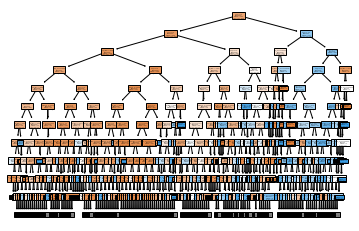

In [27]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, max_depth=10);

# `DecisionTreeClassifier()` with Custom Hyperparameters

In [4]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - The `model` has this hyperparameters ↓

In [28]:
model = DecisionTreeClassifier()

In [29]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## 1a Configuración

In [31]:
model = DecisionTreeClassifier(min_samples_leaf=200)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=200)

### Accuracy

> In `train` data

In [34]:
model.score(X_train, y_train)

0.8215714285714286

> In `test` data

In [35]:
model.score(X_test, y_test)

0.8175555555555556

## Model Visualization

> - `plot_tree()`

In [37]:
from sklearn.tree import plot_tree

In [38]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [39]:
model

DecisionTreeClassifier(min_samples_leaf=200)

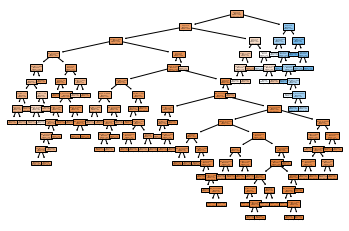

In [41]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 2a Configuración

In [42]:
model = DecisionTreeClassifier(min_samples_leaf=300)

In [43]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=300)

### Accuracy

> In `train` data

In [44]:
model.score(X_train, y_train)

0.8213333333333334

> In `test` data

In [45]:
model.score(X_test, y_test)

0.8187777777777778

## Model Visualization

> - `plot_tree()`

In [46]:
from sklearn.tree import plot_tree

In [47]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [48]:
model

DecisionTreeClassifier(min_samples_leaf=300)

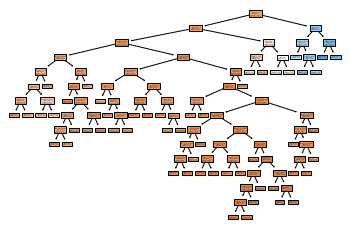

In [49]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 3a Configuración

In [50]:
model = DecisionTreeClassifier(min_samples_leaf=400)

In [51]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=400)

### Accuracy

> In `train` data

In [52]:
model.score(X_train, y_train)

0.8200952380952381

> In `test` data

In [53]:
model.score(X_test, y_test)

0.8175555555555556

## Model Visualization

> - `plot_tree()`

In [54]:
from sklearn.tree import plot_tree

In [55]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [56]:
model

DecisionTreeClassifier(min_samples_leaf=400)

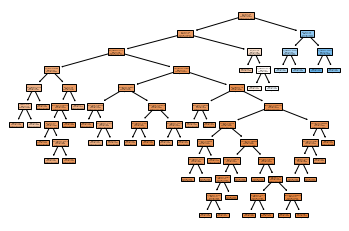

In [57]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 4a Configuración

In [58]:
model = DecisionTreeClassifier(min_samples_leaf=200, criterion='entropy')

In [59]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=200)

### Accuracy

> In `train` data

In [60]:
model.score(X_train, y_train)

0.8215714285714286

> In `test` data

In [61]:
model.score(X_test, y_test)

0.8175555555555556

## Model Visualization

> - `plot_tree()`

In [62]:
from sklearn.tree import plot_tree

In [63]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [64]:
model

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=200)

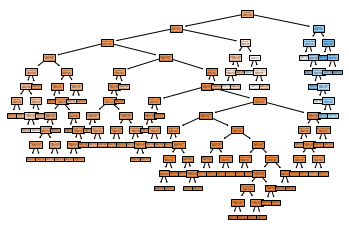

In [65]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 5a Configuración

In [66]:
model = DecisionTreeClassifier(min_samples_leaf=200, criterion='entropy', max_depth=10)

In [67]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=200)

### Accuracy

> In `train` data

In [68]:
model.score(X_train, y_train)

0.8215714285714286

> In `test` data

In [69]:
model.score(X_test, y_test)

0.8175555555555556

## Model Visualization

> - `plot_tree()`

In [70]:
from sklearn.tree import plot_tree

In [71]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [72]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=200)

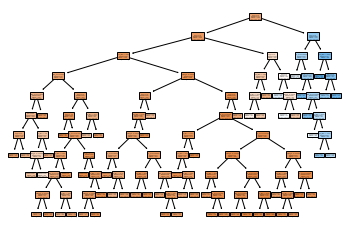

In [73]:
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `GridSearchCV()` to find Best Hyperparameters

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [74]:
from sklearn.model_selection import GridSearchCV

In [82]:
GridSearchCV()

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [83]:
model = DecisionTreeClassifier()

In [84]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [85]:
df.shape

(30000, 24)

In [86]:
a = {
    'max_depth': [None, 10, 12, 16, 24, 40],
    'min_samples_leaf': [100, 200, 300, 400],
    'criterion': ['gini', 'entropy']
}

In [88]:
cv = GridSearchCV(estimator=model, param_grid=a)

In [89]:
cv.__dict__

{'scoring': None,
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'refit': True,
 'cv': None,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'max_depth': [None, 10, 12, 16, 24, 40],
  'min_samples_leaf': [100, 200, 300, 400],
  'criterion': ['gini', 'entropy']}}

In [90]:
cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 12, 16, 24, 40],
                         'min_samples_leaf': [100, 200, 300, 400]})

In [95]:
cv.best_estimator_()

TypeError: 'DecisionTreeClassifier' object is not callable

In [98]:
cv.best_estimator_

DecisionTreeClassifier(min_samples_leaf=100)

In [100]:
cv.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 100}

In [101]:
cv.score(X_train, y_train)

0.8244285714285714

In [102]:
cv.score(X_test, y_test)

0.8176666666666667

# Other Models

## Support Vector Machines `SVC()`

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## `KNeighborsClassifier()`

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Best Model with Best Hyperparameters